### Machine Learning Assignment


Exercise:-

Using the datasets methods in sklearn (make_classification), create a
data set with 500,000 observations and 3 classes. Add some noise too.

1. Implement a neural network model with 4 hidden layers using Keras
2. Varying the number of neurons and activation functions
3. Plot the training and testing error, training and testing accuracy
4. Plot the confusion matrix and write a summary of your findings.



In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

2023-05-09 15:57:21.743520: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500000, n_features=10, n_classes=3, 
                       flip_y =0.05 , random_state=42, class_sep = 1.5, n_informative= 8 )

In [16]:
X

array([[ 1.90555709,  3.40141098,  2.1371159 , ..., -7.92295298,
        -3.5034225 , -1.43964733],
       [ 1.81761074,  2.01538928, -0.60126698, ..., -4.37021248,
         0.43756382, -2.0731156 ],
       [ 0.1446802 ,  0.52172376,  3.53067208, ..., -6.28363476,
         2.26992086, -2.96258982],
       ...,
       [ 2.93214691,  2.74010571, -0.73425937, ..., -5.37457005,
        -1.0720504 ,  0.52528091],
       [ 0.81665207, -1.61936273, -1.89994547, ...,  2.55789239,
         1.33214529,  1.70534247],
       [-1.18700658,  1.52120698,  2.86243395, ...,  1.54784772,
         2.72544363,  1.48986755]])

In [17]:
y

array([2, 1, 0, ..., 2, 0, 2])

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = to_categorical(y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [21]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=10, batch_size=32)

Epoch 1/10
10938/10938 [==============================] - 22s 2ms/step - loss: 0.2119 - accuracy: 0.9491 - val_loss: 0.1889 - val_accuracy: 0.9575
Epoch 2/10
10938/10938 [==============================] - 23s 2ms/step - loss: 0.1873 - accuracy: 0.9586 - val_loss: 0.1800 - val_accuracy: 0.9613
Epoch 3/10
10938/10938 [==============================] - 27s 2ms/step - loss: 0.1828 - accuracy: 0.9606 - val_loss: 0.1798 - val_accuracy: 0.9616
Epoch 4/10
10938/10938 [==============================] - 36s 3ms/step - loss: 0.1812 - accuracy: 0.9613 - val_loss: 0.1762 - val_accuracy: 0.9628
Epoch 5/10
10938/10938 [==============================] - 31s 3ms/step - loss: 0.1802 - accuracy: 0.9618 - val_loss: 0.1765 - val_accuracy: 0.9626
Epoch 6/10
10938/10938 [==============================] - 30s 3ms/step - loss: 0.1792 - accuracy: 0.9622 - val_loss: 0.1764 - val_accuracy: 0.9629
Epoch 7/10
10938/10938 [==============================] - 29s 3ms/step - loss: 0.1788 - accuracy: 0.9622 - val_loss: 0

4688/4688 [==============================] - 9s 2ms/step


Text(33.0, 0.5, 'True labels')

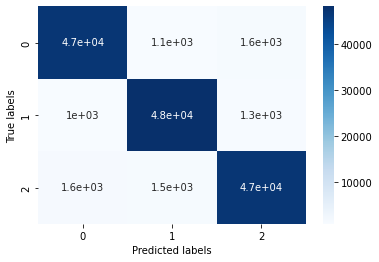

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

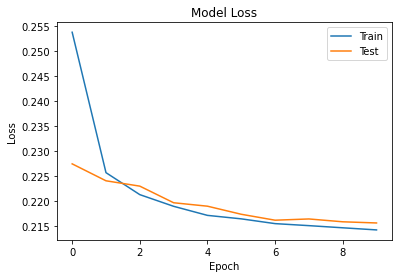

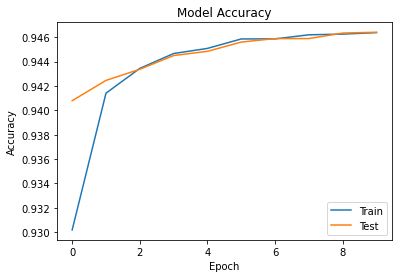

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()